# Semantic Segmentation

This script utilizes the [MICCAI2021 Cataract Semantic Segmentation Model](https://github.com/RViMLab/MICCAI2021_Cataract_semantic_segmentation) from the [Robotics and Vision in Medicine Lab at King's College of London](https://rvim.online/) to generate pixel level segmentations of our data. For our purposes, the output segmentations will allow us to identify anatomical landmarks in our images and analyze their positions relative to our surgical trajectories, which can be important aspects of feedback for surgical trainees.
> [**Effective Semantic Segmentation in Cataract Surgery: What matters most?**](https://arxiv.org/pdf/2108.06119),            
> [Theodoros Pissas*](https://rvim.online/author/theodoros-pissas/), [Claudio S. Ravasio*](https://rvim.online/author/claudio-ravasio/), [Lyndon Da Cruz](), [Christos Bergeles](https://rvim.online/author/christos-bergeles/)  (* equal contribution) <br>
>
> *arXiv technical report ([arXiv 2108.06119](https://arxiv.org/pdf/2108.06119))*
>
> *MICCAI 2021 ([proceedings](https://link.springer.com/chapter/10.1007/978-3-030-87202-1_49))*



# ⚙️  Set Up

#### ⚠️ **This script must be run on a CUDA GPU**
To run with a GPU, go to the COLAB taskbar above and go to `Runtime > Change runtime type` and select `GPU` under hardware accelerator. *COLAB will remember this preference the next time you run this ipynb file.*

In [1]:
# To begin, run this cell (NO NEED TO EDIT)

# Mount our Google Drive to access files
from google.colab import drive
drive.mount('/content/drive')

# Import and install all needed libaries
import torch
import tensorboard
import h5py
import matplotlib
import numpy as np
import scipy
import cv2
import pandas
import PIL
import future
!pip install ttach
import ttach
import tqdm
import os
import sys

%load_ext autoreload
%autoreload 2

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


You will now need to specify where your images are located. Please specify the absolute path to the directory containing the `images` folder of our dataset in your Google Drive. (If you are utilizing our dataset downloaded from our [Google Drive link](https://drive.google.com/drive/folders/1QUk7AXNivhF9SRqwJA2lCihnp-nO8Juh?usp=sharing), you should specify the location of this `datasets` folder in your Google Drive.)

Additionally, we will also need to specify the REPO_LOC to access our code.

In [2]:
# Specify the location of the dataset folder (EDIT REQUIRED)
DATA_LOC = "/content/drive/MyDrive/Rhexis/datasets/Dataset_1000"

# Specify the location of the repo folder (EDIT REQUIRED)
REPO_LOC = "/content/drive/MyDrive/cs231n/rhexis-trajectory"

## Task Selection Overview
The CADIS dataset is designed to accomdate three different class groupings, organized to focus on different classification 'tasks'. [[1]](https://www.sciencedirect.com/science/article/pii/S1361841521000992#tbl0005)

* Task 1
  * Focused on differentiating between anatomy and instruments within every frame.


* Task 2
  * Includes seperate labels for various instrument types to allow specific instrument classification.


* Task 3
  * Includes seperate labels for various instrument types to allow specific instrument classification, and also differentiates classes between instrutment handles and tips.


Specify which task you would like to generate labels with below:</br>
`task = 1` will create labels using task one </br>
`task = 2` will create labels using task two </br>
`task = 3` will create labels using task three </br>

In [3]:
# Specify which task you would like to utilize (EDIT REQUIRED)
task = 2

## 👁  Generate Labels

Run the following cells to generate the requested labels. The labels will be saved to a new directory inside of the `DATA_LOC` location specified above.

In [4]:
# Change directory to Semantic Segmentation directory to access files
cwd = os.path.join(REPO_LOC,"Semantic_Segmentation")
%cd $cwd

# Import custom utils python module
from utils import * 

# Load model object
model = configure_segmentation_model(task)

/content/drive/.shortcut-targets-by-id/1XpkDo4n-YnWllOv5Dr1Pf4JIKNXlNz4v/rhexis-trajectory/Semantic_Segmentation
Loading model from saved checkpoint...
Model successfully loaded from:
/content/drive/.shortcut-targets-by-id/1XpkDo4n-YnWllOv5Dr1Pf4JIKNXlNz4v/rhexis-trajectory/Semantic_Segmentation/segmentation_models/model_task2/chkpts/chkpt_best.pt


In [5]:
# Load in images
x, img_data = read_in_images(DATA_LOC)

Loading in images:
1000 jpg files detected

Images loaded successfully


In [12]:
# Forward pass our data through the model to get labels
labels = create_labels(model, x)

Creating Labels:
Batch 1 of 2
-Applying forward pass
-Calculating softmax and outputing labels
Batch 2 of 2
-Applying forward pass
-Calculating softmax and outputing labels


In [14]:
print(labels.shape)

(40, 540, 960)


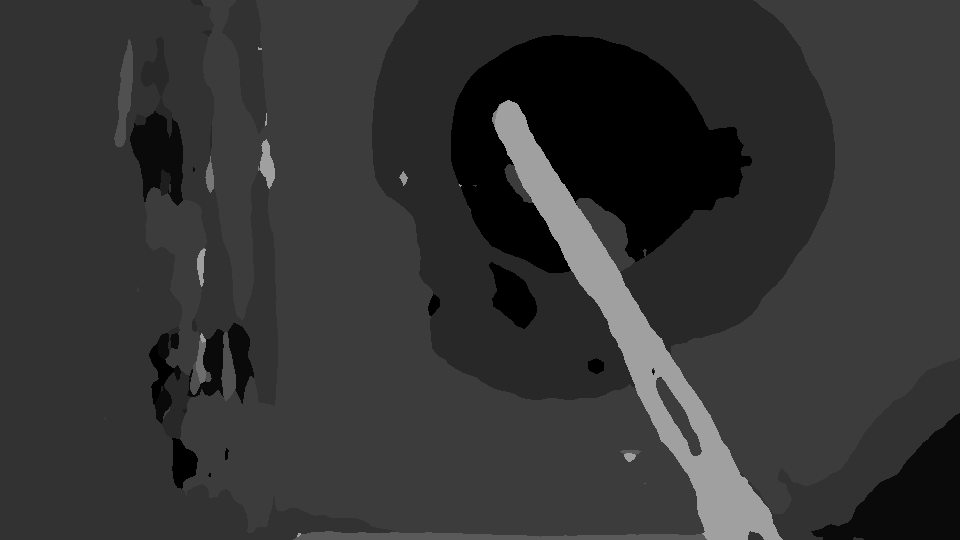

In [23]:
# Create images
from google.colab.patches import cv2_imshow

cv2_imshow(10*labels[4])